In [1]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.2 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.0 MB/s  0:00:00

   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [5]:
df = pd.read_csv(
    r"C:\Users\Mariselvam\Downloads\Student_Satisfaction_Survey.csv",
    encoding='latin1'
)

df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [7]:
df.describe()

,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000


In [8]:
df.isnull().sum()


SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

In [9]:
numeric_cols = [
    'Total Feedback Given', 'Total Configured',
    'Weightage 1', 'Weightage 2', 'Weightage 3',
    'Weightage 4', 'Weightage 5',
    'Average/ Percentage'
]

df[numeric_cols] = df[numeric_cols].fillna(0)


In [10]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [12]:
print(df.columns)


Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')


In [13]:
df.columns = df.columns.str.strip()


In [14]:
print(df.columns)


Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name', 'Basic Course'],
      dtype='object')


In [15]:
df['Questions'] = df['Questions'].astype(str).str.strip()
df['Course Name'] = df['Course Name'].astype(str).str.strip()
df['Basic Course'] = df['Basic Course'].astype(str).str.strip()


In [16]:
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,NaN,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,NaN,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,NaN,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,NaN,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,NaN,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [17]:
#Sentiment Analysis(TextBox)

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [18]:
df['Sentiment'] = df['Questions'].apply(get_sentiment)
df[['Questions', 'Sentiment']].head()


,Questions,Sentiment
0,How much of the syllabus was covered in the cl...,Positive
1,How well did the teachers prepare for the clas...,Neutral
2,How well were the teachers able to communicate?,Positive
3,The teachers approach to teaching can best be...,Positive
4,Fairness of the internal evaluation process by...,Neutral


In [19]:
#Basic Insights

df.groupby('Course Name')['Average/ Percentage'].mean().sort_values(ascending=False)


Course Name
FY B.VOC FOOD TECHNOLOGY           NaN
FY BCOM (ACCOUNTING & FINANCE)     NaN
FY BCOM (BANKING & INSURANCE)      NaN
FYBA                               NaN
FYBMS                              NaN
FYBSC                              NaN
M.SC PART - 1 COMPUTER SCIENCE     NaN
M.SC PART - 2 COMPUTER SCIENCE     NaN
MA PSYCHOLOGY - 1                  NaN
MA PSYCHOLOGY - 3                  NaN
MSC ANALYTICAL CHEMISTRY SEM I     NaN
MSC ANALYTICAL CHEMISTRY SEM III   NaN
MSC DATA SCIENCE - 1               NaN
MSC DATA SCIENCE - 3               NaN
MSC INFORMATION TECHNOLOGY - 1     NaN
MSC INFORMATION TECHNOLOGY - 3     NaN
MSC MICROBIOLOGY - 1               NaN
MSC MICROBIOLOGY - 3               NaN
MSC ORGANIC CHEMISTRY - 3          NaN
MSC PHYSICS - 3                    NaN
S.Y.B.A.F                          NaN
SY COMPUTER SCIENCE                NaN
SYBCOM                             NaN
SYBMS                              NaN
SYBSC                              NaN
TYBA         

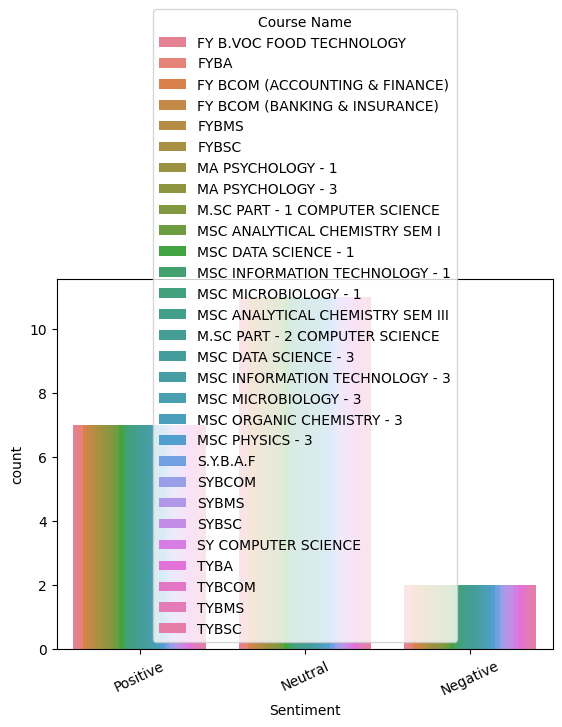

In [21]:
sns.countplot(x='Sentiment', hue='Course Name', data=df)
plt.xticks(rotation=25)
plt.show()


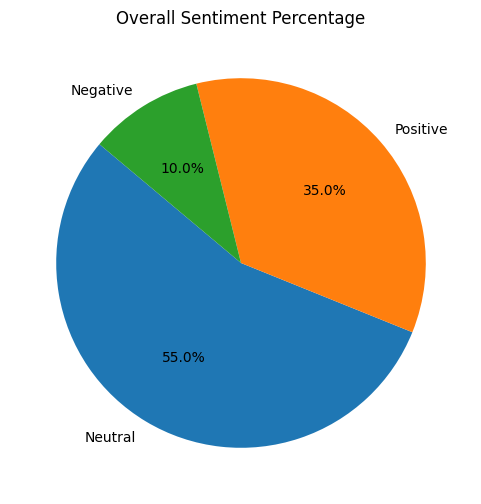

In [22]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Overall Sentiment Percentage")
plt.show()


In [26]:
print(avg_sentiment)


Sentiment
Negative   NaN
Neutral    NaN
Positive   NaN
Name: Average/ Percentage, dtype: float64


In [27]:
df['Average/ Percentage'].head(10)


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: Average/ Percentage, dtype: float64

In [28]:
df['Average/ Percentage'].unique()[:10]


array([nan])

In [29]:
# Strip column names
df.columns = df.columns.str.strip()

# Clean Average/ Percentage column
df['Average/ Percentage'] = (
    df['Average/ Percentage']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

# Convert to numeric
df['Average/ Percentage'] = pd.to_numeric(
    df['Average/ Percentage'],
    errors='coerce'
)


In [36]:
# Convert weightage columns to numeric
weightage_cols = [
    'Weightage 1', 'Weightage 2', 'Weightage 3',
    'Weightage 4', 'Weightage 5'
]

df[weightage_cols] = df[weightage_cols].apply(
    pd.to_numeric, errors='coerce'
)

# Calculate weighted average score
df['Calculated_Score'] = (
    df['Weightage 1'] * 1 +
    df['Weightage 2'] * 2 +
    df['Weightage 3'] * 3 +
    df['Weightage 4'] * 4 +
    df['Weightage 5'] * 5
) / (
    df[weightage_cols].sum(axis=1)
)


In [37]:
df[['Sentiment', 'Calculated_Score']].head(10)


,Sentiment,Calculated_Score
0,Positive,3.0
1,Neutral,5.0
2,Positive,5.0
3,Positive,3.0
4,Neutral,4.0
5,Neutral,4.0
6,Negative,3.0
7,Positive,2.0
8,Neutral,4.0
9,Negative,3.0


In [38]:
df['Calculated_Score'].describe()


count    580.000000
mean       3.842792
std        0.628932
min        1.333333
25%        3.500000
50%        3.916667
75%        4.250000
max        5.000000
Name: Calculated_Score, dtype: float64

In [39]:
avg_sentiment = df.groupby('Sentiment')['Calculated_Score'].mean()
print(avg_sentiment)


Sentiment
Negative    3.799457
Neutral     3.858443
Positive    3.830577
Name: Calculated_Score, dtype: float64


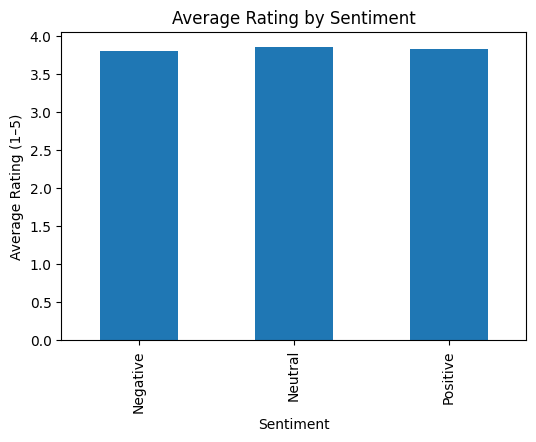

In [40]:
avg_sentiment.plot(kind='bar', figsize=(6,4))
plt.title("Average Rating by Sentiment")
plt.ylabel("Average Rating (1–5)")
plt.xlabel("Sentiment")
plt.show()


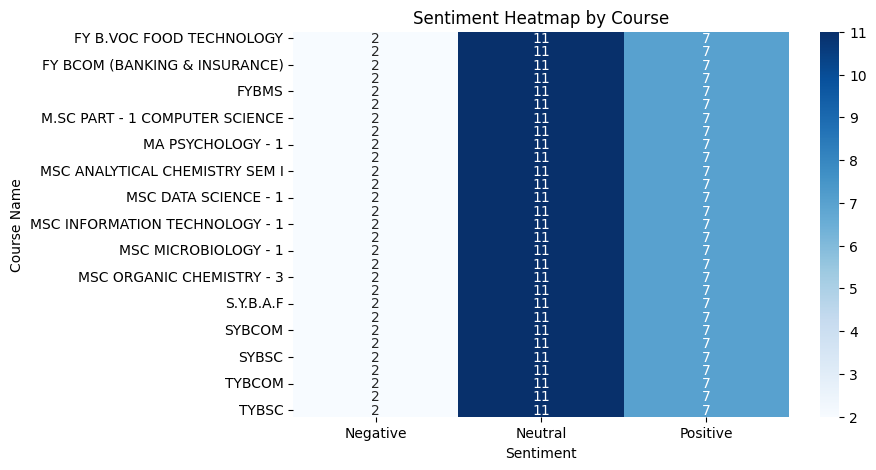

In [41]:
pivot_table = pd.crosstab(df['Course Name'], df['Sentiment'])

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="d")
plt.title("Sentiment Heatmap by Course")
plt.show()


In [42]:
!pip install wordcloud


In [43]:
from wordcloud import WordCloud


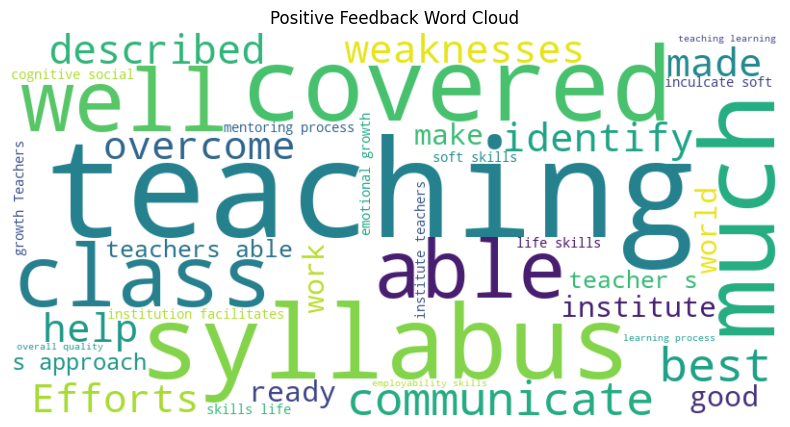

In [44]:
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Questions'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Feedback Word Cloud")
plt.show()


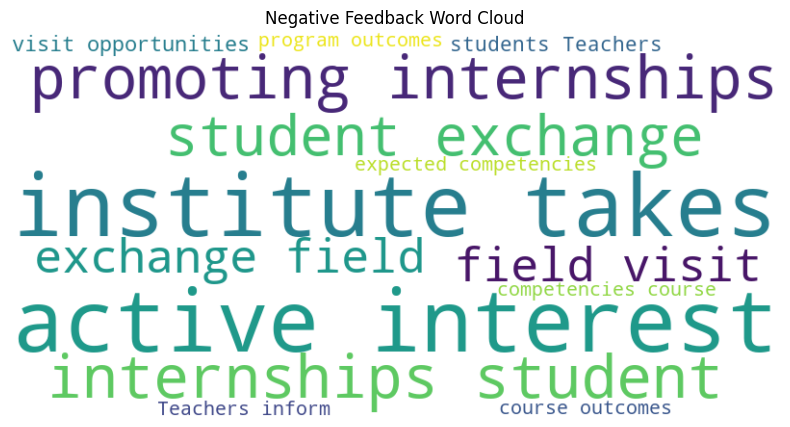

In [45]:
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Questions'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Feedback Word Cloud")
plt.show()


In [46]:
df.to_csv('College Event Feedback Analysis.csv', index=False)
